In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import bench
import display

from string import digits
from os import listdir
from os.path import isfile, join, getsize

%load_ext autoreload
%autoreload 2

onlyfiles = [f for f in listdir('out/') if isfile(join('out/', f))]
app_grid = [f for f in onlyfiles if re.search('app_grid',f)]
app_grid.append("app_grid_3layers_reference.txt")
app_grid.append("app_grid_4layers_reference.txt")

onlyfilesbak =  [f for f in listdir('out_back_up/') if isfile(join('out_back_up/', f))]
app_grid_back = [f for f in onlyfilesbak if re.search('app_grid',f)]

cs_grid = [f for f in onlyfiles if re.search('cs_grid',f)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
app = bench.AppDelay([f"out/{i}" for i in app_grid])
app_back = bench.AppDelay([f"out_back_up/{i}" for i in app_grid_back])

print(app.data_.columns)
app.data_

Index(['Time', 'Node', 'AppId', 'SeqNo', 'Type', 'DelayS', 'DelayUS',
       'RetxCount', 'HopCount', 'source', 'NodeType', 'NodeNumber', 'Cache',
       'CacheCapacity', 'CacheStrategy', 'Layers'],
      dtype='object')


,Time,Node,AppId,SeqNo,Type,DelayS,DelayUS,RetxCount,HopCount,source,NodeType,NodeNumber,Cache,CacheCapacity,CacheStrategy,Layers
0,2.05340,csm1,0,5,Last,0.003397,3396.58,1,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
1,2.05340,csm1,0,5,Full,0.003397,3396.58,1,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
2,2.15167,csm1,0,15,Last,0.001672,1671.56,1,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
3,2.15167,csm1,0,15,Full,0.001672,1671.56,1,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
4,2.55205,csm1,0,50,Last,0.002046,2045.95,1,1.0,app_grid_3layers_random_2000.txt,csm,1,random,2000,everywhere,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,14.76830,csm13,0,17,Full,0.201671,201671.00,1,1.0,app_grid_3layers_fifo_15.txt,csm,13,fifo,15,everywhere,3
410,14.76830,csm9,0,17,Last,0.001671,1670.72,1,1.0,app_grid_3layers_fifo_15.txt,csm,9,fifo,15,everywhere,3
411,14.76830,csm9,0,17,Full,4.101670,4101670.00,5,1.0,app_grid_3layers_fifo_15.txt,csm,9,fifo,15,everywhere,3
412,14.85340,csm11,0,25,Last,1.586780,1586780.00,1,1.0,app_grid_3layers_fifo_15.txt,csm,11,fifo,15,everywhere,3


In [32]:
app.data_["Interval"] = app.data_["Time"] // 1
app_back.data_["Interval"] = app_back.data_["Time"] // 1

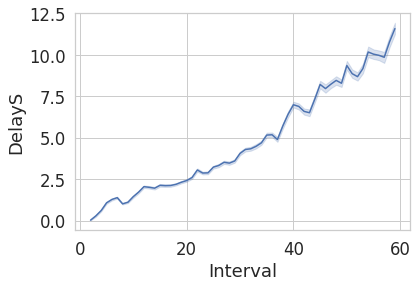

In [34]:
# sns.lineplot(x = "Interval", y = "DelayS", data = app.data_[
#     (app.data_["CacheCapacity"] == "15")
# ])
sns.lineplot(x = "Interval", y = "DelayS", data = app_back.data_[
    (app_back.data_["CacheCapacity"] == "15")
])

In [28]:
app.data_[
    (app.data_["CacheCapacity"] == "15") & 
    (app.data_["Type"] == "Full") 
].groupby(["Cache", "CacheStrategy"]).describe()["DelayS"]

count     mean       std       min      25%       50%  \
Cache  CacheStrategy                                                          
fifo   everywhere     346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
       fog            346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
       frontier       346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
lfu    everywhere     346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
       fog            346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
       frontier       346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
lru    everywhere     346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
       fog            346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
       frontier       346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
random everywhere     346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
       fog            346.0  1.82919  1.429569  0.001671  0.63625  1.635005   
       frontier       346.0  1.82919  1.429569  0.001671  0.63625  1.635005   

                           75%      max  
Cache  CacheStrategy                     
fifo   everywhere     2.904348  8.23727  
       fog            2.904348  8.23727  
       frontier       2.904348  8.23727  
lfu    everywhere     2.904348  8.23727  
       fog            2.904348  8.23727  
       frontier       2.904348  8.23727  
lru    everywhere     2.904348  8.23727  
       fog            2.904348  8.23727  
       frontier       2.904348  8.23727  
random everywhere     2.904348  8.23727  
       fog            2.904348  8.23727  
       frontier       2.904348  8.23727

In [35]:
app_back.data_[
    (app_back.data_["CacheCapacity"] == "15") & 
    (app_back.data_["Type"] == "Full") 
].groupby(["Cache", "CacheStrategy"]).describe()["DelayS"]

count       mean       std       min       25%  \
Cache  CacheStrategy                                                     
fifo   everywhere     15009.0   8.645237  8.235883  0.000299  1.638340   
       fog             8472.0   9.197396  9.138593  0.001238  1.561937   
       frontier       20586.0  10.739670  9.179907  0.000063  2.460152   
lfu    everywhere     21806.0  10.744352  9.314974  0.000520  2.387358   
       fog            11098.0  10.878611  9.189199  0.001671  2.532665   
       frontier       22031.0   9.922808  8.926189  0.000114  1.907475   
lru    everywhere     10016.0  10.595797  9.192934  0.000704  2.231910   
       fog               98.0   1.832108  1.670962  0.001671  1.007160   
       frontier       10551.0  10.859854  9.236429  0.000704  2.320150   
random everywhere     15538.0   9.511490  8.438312  0.000180  1.925797   
       fog            10028.0  11.066912  9.464856  0.000638  2.674952   
       frontier       10360.0  11.024404  9.238677  0.000704  2.902830   

                           50%        75%       max  
Cache  CacheStrategy                                 
fifo   everywhere     6.246000  13.161000  50.75490  
       fog            6.294725  14.541850  51.13350  
       frontier       8.550975  16.536575  45.59680  
lfu    everywhere     8.560605  16.501475  49.61530  
       fog            8.935385  16.829425  47.86450  
       frontier       7.644270  15.212050  52.04930  
lru    everywhere     8.471460  16.193575  49.92110  
       fog            1.353090   2.264285   9.00246  
       frontier       8.731420  16.848250  45.59680  
random everywhere     7.410610  14.514375  50.34010  
       fog            8.877070  16.971100  51.17930  
       frontier       8.950010  17.025075  45.59680

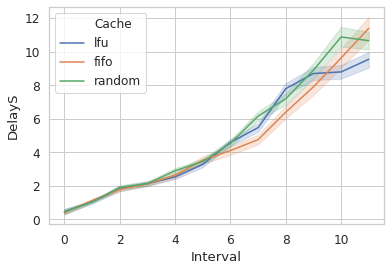

In [51]:
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
app_back.data_["Interval"] = app_back.data_["Time"] // 5
sns.lineplot(x = "Interval", y = "DelayS", hue = "Cache", data = app_back.data_[
    (app_back.data_["CacheCapacity"] == "15") &
    (app_back.data_["CacheStrategy"] == "fog") &
    (app_back.data_["Cache"] != "lru")
])

# g = sns.FacetGrid(app_back.data_, col = "CacheStrategy", row = "Cache")
# g.map(sns.lineplot, "Interval", "DelayS")